In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv("/content/drive/My Drive/DATASETS /US_Heart_Patients.csv")

In [0]:
df.rename(columns={'male':'gender'},inplace=True)

In [6]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [0]:
data=df.dropna()

In [8]:
data.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
data.shape

(3658, 16)

In [0]:
X_PM=data[['age','gender','cigsPerDay','sysBP','glucose']]
X_AL=data.drop("TenYearCHD",axis=1)
Y=data["TenYearCHD"]

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_PMS=sc.fit_transform(X_PM)
X_ALL=sc.fit_transform(X_AL)

In [12]:
X_PMS.shape

(3658, 5)

In [13]:
X_ALL.shape

(3658, 15)

#### AFTER Feature Selection

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [0]:
LR=LogisticRegression()
NB=GaussianNB()

In [0]:
models=[]
models.append(("LR",LR))
models.append(("Naivebayes",NB))

LR: 0.730523 (0.002275)
Naivebayes: 0.724005 (0.001844)


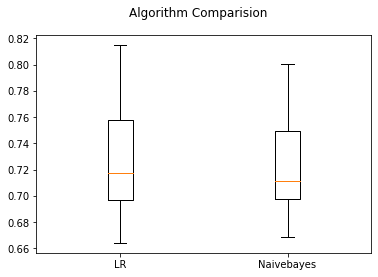

In [18]:
# evaluate each model in turn
from sklearn import model_selection
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results = model_selection.cross_val_score(model,X_PMS,Y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
#boxplot algorith comparision
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Here for all Features

In [0]:
import warnings
warnings.filterwarnings("ignore")

#### importing the models

In [0]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',random_state = 0)
RF=RandomForestClassifier(n_estimators=10,random_state=0)
KNN= KNeighborsClassifier(n_neighbors=448,weights='distance')
NB=GaussianNB()
#bagging models
KNN_BAG=BaggingClassifier(base_estimator=KNN, n_estimators=10,random_state = 0)
LR_BAG=BaggingClassifier(base_estimator=LR, n_estimators=23,random_state = 0)
NB_BAG=BaggingClassifier(base_estimator=NB, n_estimators=10,random_state = 0)
DT_BAG=BaggingClassifier(n_estimators=10,random_state = 0)
#bosting models
LR_BOST=AdaBoostClassifier(base_estimator=LR, n_estimators=50,random_state = 0)
NB_BOST=AdaBoostClassifier(base_estimator=NB, n_estimators=50,random_state = 0)
RF_BOST=AdaBoostClassifier(base_estimator=RF, n_estimators=50,random_state = 0)
DT_BOST=AdaBoostClassifier(base_estimator=DT, n_estimators=50,random_state = 0)
Gboost=GradientBoostingClassifier(n_estimators=500)

In [0]:
models=[]
models.append(("LR",LR))
models.append(("FGDT",DT))
models.append(("RF",RF))
models.append(("KNN",KNN))
models.append(("NAIVEBAYES",NB))
models.append(("KNN_BAG",KNN_BAG))
models.append(("LR_BAG",LR_BAG))
models.append(("NB_BAG",NB_BAG))
models.append(("DT_BAG",DT_BAG))
models.append(("LR_BOST",LR_BOST))
models.append(("NB_BOST",NB_BOST))
models.append(("RF_BOST",RF_BOST))
models.append(("DT_BOST",DT_BOST))
models.append(("Gboost",Gboost))

LR: 0.730366 (0.002339)
FGDT: 0.555879 (0.002426)
RF: 0.648984 (0.003420)
KNN: 0.715437 (0.002381)
NAIVEBAYES: 0.713966 (0.002759)
KNN_BAG: 0.717554 (0.002312)
LR_BAG: 0.730075 (0.002270)
NB_BAG: 0.714629 (0.002760)
DT_BAG: 0.657649 (0.004137)
LR_BOST: 0.730100 (0.002313)
NB_BOST: 0.467634 (0.003204)
RF_BOST: 0.645863 (0.001927)
DT_BOST: 0.552864 (0.002557)
Gboost: 0.659943 (0.000971)


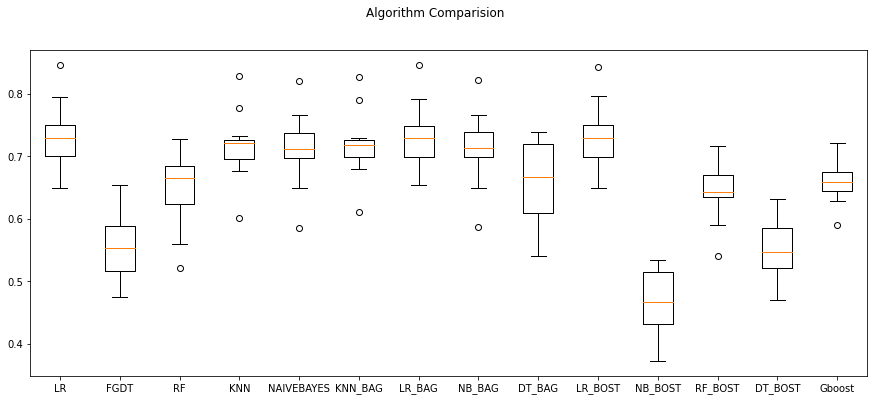

In [108]:
# evaluate each model in turn
from sklearn import model_selection
results=[]
names=[]
for name, model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=15,random_state=0)
    cv_results = model_selection.cross_val_score(model,X_ALL,Y,cv=kfold,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))
#boxplot algorith comparision
fig = plt.figure(figsize=(15,6))
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## parameters tuning

#### Finding n_estimators for KNN and DT

In [0]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#param= {'n_neighbors': np.arange(1,500),'weights':['uniform','distance']}
#GS= GridSearchCV(knn,param, cv=15,scoring='roc_auc')
#GS.fit(X_ALL,Y)

In [0]:
#GS.best_params_ 

In [0]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier(random_state=0)
#par_dt= {'criterion':["entropy",'gini']}
#GS_dt= GridSearchCV(dt,par_dt, cv=15,scoring='roc_auc')
#GS_dt.fit(X_ALL,Y)

In [0]:
#GS_dt.best_params_ 

#### Tuning N_estimator for bagginglr model

In [0]:
#auc_var=[]
#for val in np.arange(1,100):
    #LR_BAG=BaggingClassifier(base_estimator=LR, n_estimators=val,random_state=0)
    #kfold = model_selection.KFold(shuffle=True,n_splits=15,random_state=0)
    #results = model_selection.cross_val_score(LR_BAG,X_ALL,Y,cv=kfold,scoring='roc_auc')
    #auc_var.append(np.var(results,ddof=1))
#print(auc_var)

In [0]:

#np.argmin(auc_var)

In [0]:
#x_axis=np.arange(1,100)
#plt.plot(x_axis,auc_var)


In [0]:
#gredient bosting 

In [0]:
data=pd.DataFrame({"age":[13,14,15,25,35,49,68,71,73],"LIKESGARDENING":["F","F","F","T","F","T","T","T","T"],"VIDEGAMES":["T","T","T","T","T","F","T","F","F"],"LIKESHAT":["T","F","F","T","T","F","T","F","T"]})

In [34]:
datab

,age,LIKESGARDENING,VIDEGAMES,LIKESHAT
0,13,F,T,T
1,14,F,T,F
2,15,F,T,F
3,25,T,T,T
4,35,F,T,T
5,49,T,F,F
6,68,T,T,T
7,71,T,F,F
8,73,T,F,T


In [0]:
age=np.array([13,14,15,25,35,49,68,71,73])

In [36]:
mse=(np.sum((data.age-np.mean(data.age))**2))/9
mse

577.1111111111111

In [39]:
F=(13+14+15+35)/4
F

19.25

In [41]:
T=(25+49+68+71+73)/5
T

57.2

In [0]:
ageF=np.array([13,14,15,35])
ageT=np.array([25,49,68,71,73])

In [43]:
mseF=(np.sum((ageF-np.mean(ageF))**2))/4
mseF

83.1875

In [44]:
mseT=(np.sum((ageT-np.mean(ageT))**2))/5
mseT

332.15999999999997

In [46]:
MSE=mseF+mseT
MSE

415.34749999999997

In [48]:
Residue1=ageF-np.mean(ageF)
Residue1

array([-6.25, -5.25, -4.25, 15.75])

In [50]:
Residue2=ageT-np.mean(ageT)
Residue2

array([-32.2,  -8.2,  10.8,  13.8,  15.8])

In [0]:
residueavg1=np.array([-6.25, -5.25, -4.25, 15.75,-32.2,10.8])


In [55]:
np.mean(residueavg1)

-3.566666666666667

In [56]:
residueavg2=np.array([-8.2,13.8,15.8])
np.mean(residueavg2)

7.133333333333334

In [68]:
Y_pred=np.array([19.25,19.25,19.25,57.2,19.25,57.2,57.2,57.2,57.2])
Y_pred

array([19.25, 19.25, 19.25, 57.2 , 19.25, 57.2 , 57.2 , 57.2 , 57.2 ])

In [62]:
tree2=np.array([-3.56,-3.56,-3.56,-3.56,-3.56,7.13,-3.56,7.13,7.13])
tree2

array([-3.56, -3.56, -3.56, -3.56, -3.56,  7.13, -3.56,  7.13,  7.13])

In [70]:
ensembleprediction=np.subtract(Y_pred,-(tree2))
ensembleprediction

array([15.69, 15.69, 15.69, 53.64, 15.69, 64.33, 53.64, 64.33, 64.33])

In [71]:
np.mean(ensembleprediction)

40.336666666666666

In [78]:
mse=(np.sum((age-np.mean(ensembleprediction))**2))/9
mse

577.1111222222222

In [81]:
finalresidue=np.subtract(age,ensembleprediction)
finalresidue

array([ -2.69,  -1.69,  -0.69, -28.64,  19.31, -15.33,  14.36,   6.67,
         8.67])

In [101]:
auc_avg=[]
for val in np.arange(1,200):
    Gboost=Gboost=GradientBoostingClassifier(n_estimators=val)
    kfold = model_selection.KFold(shuffle=True,n_splits=15,random_state=0)
    results = model_selection.cross_val_score(Gboost,X_ALL,Y,cv=kfold,scoring='roc_auc')
    auc_avg.append(np.var(results,ddof=1))
print(auc_avg)

[0.003974895789663893, 0.003405734646250979, 0.004299387899435604, 0.004413840246689337, 0.004332424008154359, 0.004173922125064358, 0.003925223087289443, 0.003945482172300662, 0.0038015874468195136, 0.004015486184714442, 0.003858329105121283, 0.003938812406607336, 0.004176371773446856, 0.004156896563110477, 0.004052619692130956, 0.004178716321552193, 0.004074768962896326, 0.0038883206149498274, 0.004000544852045995, 0.004033680670892369, 0.004035550536070604, 0.0037917140497340626, 0.003921761526482487, 0.003724179711181108, 0.0036961349377826855, 0.003715555644993356, 0.0037335746479504424, 0.0035487677573957863, 0.0034881535643944356, 0.0035765287636161393, 0.00347614436737247, 0.003537109724052853, 0.0033444649363285764, 0.0035134397063496894, 0.0034752313539031655, 0.0032383943596729007, 0.003375874133131597, 0.0032583254468782005, 0.0033226537183538665, 0.003260941174325797, 0.0032661840176573184, 0.0031543828344753173, 0.0032824951781614954, 0.003284571434375708, 0.0031969540278

In [102]:
np.argmin(auc_avg)

198

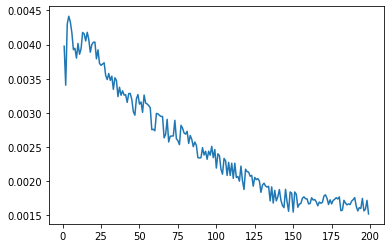

In [105]:
x_axis=np.arange(1,200)
plt.plot(x_axis,auc_avg)